# Jewelry Store Customer Segmentation

## 0. Load Data 

In [ ]:
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


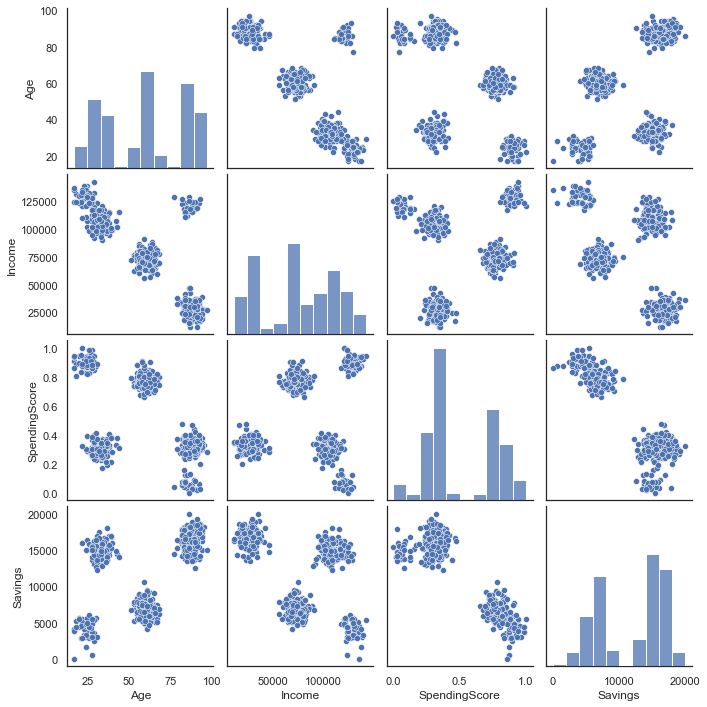

In [ ]:
# Make a pair plots with customer features
import seaborn as sns

# Store feature names of the dataset in customer_features variable
customer_features = df1.columns

# Plot features
sns.set(style='white', context='notebook')
sns.pairplot(df1, height = 2.5,x_vars= customer_features, y_vars=customer_features)

Two-dimensional plots can be used in this case because there are only four features in this dataset. Four features generates a manageable number of subplots. Using two-dimensional plots for data visualization would not be feasible when there are many more features.

While all four features do not appear on a single plot, the subplots above show how the features are distributed and their patterns relative to one another. The two-dimensional plots show between 2-5 clusters of customers. To identify the optimal number of clusters, a visual inspection of the results using the elbow method is performed and Calinski-Harabasz and Silhouette scores are used.

## 1. Clustering Algorithm #1

### K-Means Clustering

The first clustering algorithm used to identify customer personas is the K-Means algorithm. This was chosen as the first algorithm to try out because it is a fast clustering algorithm that works well with a small dataset.

### Using Raw Data (No Scaling Applied)

In [ ]:
# Apply K-Means clustering algorithm to raw data
from sklearn.cluster import KMeans

X_raw = df1.values # X_raw will also be used with the second clustering algorithm

In [ ]:
# Train and predict a K-Means model with different values for the number of clusters and calculate
# within-cluster sum of squares (WCSS) metric. A range of values for the number of clusters will be tried
# in the analysis to see if it yields more useful clusters that better identify customer personas.

customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration
wcss = [] # store calculated WCSS values that will be used during visual inspection using the elbow method

# use k-means++ method for consistent results
# using k-means++ avoids the random initialization trap when selecting cluster centroids at initialization
# set random_state seed to get reproducible results each time algorithm is run

for n in range(2, 16): # try out a sufficient number of clusters starting at 2 to ensure WCSS values converge
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
    
    customer_labels.append(kmeans.fit_predict(X_raw))
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

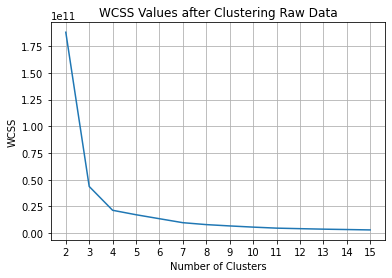

In [ ]:
# Plot results to conduct visual inspection using the elbow method to identify the optimal number of clusters
import matplotlib.pyplot as plt

# Plot WCSS values for visual inspection
plt.plot(range(2, 16), wcss)
plt.grid()
plt.title('WCSS Values after Clustering Raw Data')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(2, 16))
plt.ylabel('WCSS')

For the above WCSS plot, the elbow method indicates that 4 clusters are optimal.

##### Evaluate the Clustering Results

In [ ]:
# Use Calinski-Harabasz and Silhouette scores as validation metrics
from sklearn.metrics import calinski_harabasz_score, silhouette_score

number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_raw, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_raw, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_raw_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                             columns = ["Number of Clusters", "C-H Score", "Silhouette Score"])
df_raw_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,1277.172305,0.654731
3,3567.536978,0.739317
4,5011.811464,0.720723
5,4683.873384,0.678235
6,4796.421147,0.580112
7,5522.607366,0.517245
8,5793.726145,0.519804
9,5984.907559,0.524950
10,6351.603448,0.527365
11,6862.690314,0.509787


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_raw_scores['Number of Clusters'].iloc[[df_raw_scores['C-H Score'].idxmax()]].to_string(\
          index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_raw_scores['Number of Clusters'].iloc[[df_raw_scores['Silhouette Score'].idxmax()]].to_string(\
          index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       15
Number of clusters with the largest Silhouette Score:       3


The elbow method, Calinski-Harabasz score, and Silhouette score each give a different value for the optimal number of clusters to use. When using the K-Means algorithm, it is useful to scale all features in this dataset to the same scale to account for the fact that `Age` and `SpendingScore` are measured on scales that differ from the other features. The K-Means algorithm uses Euclidean distance as its distance metric and for the features to have equal weighting, scaling on the dataset needs to be applied.

### Using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X_raw) 

# X_std_scaled will also be used with the second clustering algorithm

In [ ]:
# Apply K-Means Clustering Algorithm
customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration
wcss = [] # store calculated WCSS values that will be used during visual inspection using the elbow method

for n in range(2, 16): # try out a sufficient number of clusters starting at 2 to ensure WCSS values converge
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)

    customer_labels.append(kmeans.fit_predict(X_std_scaled))
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

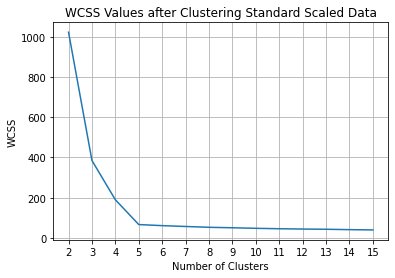

In [ ]:
# Use elbow method and plot results to conduct visual inspection to identify the optimal number of clusters
# Plot WCSS values for visual inspection
plt.plot(range(2, 16), wcss)
plt.grid()
plt.title('WCSS Values after Clustering Standard Scaled Data')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(2, 16))
plt.ylabel('WCSS')

For the above WCSS plot, the elbow method indicates that 5 clusters are optimal.

##### Evaluate the Clustering Results

In [ ]:
number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_std_scaled, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_std_scaled, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_std_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                             columns=["Number of Clusters", "C-H Score", "Silhouette Score"])
df_std_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,490.808135,0.521259
3,1066.581241,0.696348
4,1611.264737,0.758119
5,3671.358019,0.804898
6,3197.113764,0.632357
7,2860.624734,0.445455
8,2640.855798,0.297177
9,2414.577364,0.293771
10,2267.420684,0.290358
11,2131.263883,0.239212


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_std_scores['Number of Clusters'].iloc[[df_std_scores['C-H Score'].idxmax()]].to_string(\
          index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_std_scores['Number of Clusters'].iloc[[df_std_scores['Silhouette Score'].idxmax()]].to_string(\
          index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       5
Number of clusters with the largest Silhouette Score:       5


Based on the Calinski-Harabasz and Silhouette scores of the number of clusters that were tested, 5 clusters appear to be the best number of clusters to use for the customer dataset. This is in agreement with the elbow method result.

### Using MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X_raw)

# X_minmax_scaled will also be used with the second clustering algorithm

In [ ]:
# Apply K-Means Clustering Algorithm
customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration
wcss = [] # store calculated WCSS values that will be used during visual inspection using the elbow method

for n in range(2, 16): # try out a sufficient number of clusters starting at 2 to ensure WCSS values converge
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)

    customer_labels.append(kmeans.fit_predict(X_minmax_scaled))
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

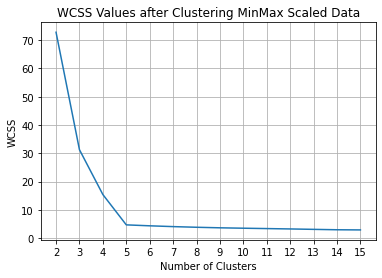

In [ ]:
# Plot WCSS values for visual inspection
plt.plot(range(2, 16), wcss)
plt.grid()
plt.title('WCSS Values after Clustering MinMax Scaled Data')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(2, 16))
plt.ylabel('WCSS')

For the above WCSS plot, the elbow method indicates that 5 clusters are optimal.

##### Evaluate the Clustering Results

In [ ]:
number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_minmax_scaled, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_minmax_scaled, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_minmax_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                                columns = ["Number of Clusters", "C-H Score", "Silhouette Score"])
df_minmax_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,528.786393,0.535141
3,947.439684,0.682351
4,1449.998273,0.756936
5,3840.105431,0.815691
6,3308.067127,0.635907
7,2947.818734,0.442910
8,2677.954567,0.283390
9,2463.234560,0.283625
10,2275.646033,0.274613
11,2124.976931,0.270487


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_minmax_scores['Number of Clusters'].loc[[df_minmax_scores['C-H Score'].idxmax()]].to_string(\
          index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_minmax_scores['Number of Clusters'].iloc[[\
          df_minmax_scores['Silhouette Score'].idxmax()]].to_string(index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       5
Number of clusters with the largest Silhouette Score:       5


Based on the Calinski-Harabasz and Silhouette scores of the number of clusters that were tested, 5 clusters appear to be the optimal number of clusters to use for the customer dataset. This is in agreement with the visual inspection of the WCSS plot using the elbow method.

### Compare Results

For the two scaling methods that were applied, every cluster evaluation technique yielded the same optimal number of clusters. To determine which scaling method yielded the best clustering result, the highest Calinski-Harabasz and Silhouette scores from each method are compared.    

In [ ]:
# Print scaling method with the highest C-H score
if df_std_scores['C-H Score'].max() > df_minmax_scores['C-H Score'].max():
  best_scaler_CH = "Standard Scaler"
else:
  best_scaler_CH = "MinMax Scaler"

print(f"Scaling method with the best Calinski-Harabasz score: {best_scaler_CH}")

# Print scaling method with the highest Silhouette score
if df_minmax_scores['Silhouette Score'].max() > df_minmax_scores['Silhouette Score'].max():
  best_scaler_silhouette = "Standard Scaler"
else:
  best_scaler_silhouette = "MinMax Scaler"

print(f"Scaling method with the best Silhouette score: {best_scaler_silhouette}")

Scaling method with the best Calinski-Harabasz score: MinMax Scaler
Scaling method with the best Silhouette score: MinMax Scaler


For the K-Means algorithm, scaling the data with the MinMaxScaler and using 5 as the number of clusters yields the best clustering results.

When using the K-Means algorithm, clustering the customer dataset into 5 clusters results in the highest Calinski-Harabasz and Silhouette scores indicating that 5 clusters is the optimal number of clusters for this dataset.

## 2. Clustering Algorithm #2

### Hierarchical Clustering

The second clustering algorithm that is selected is hierarchical clustering. It is selected because it is another popular clustering algorithm that works well with a small dataset, is flexible, and able to show clustering results in finer detail.

### Using Raw Data - No Scaling Applied

#### Using Ward Method and Euclidean Distance Metric

In [ ]:
# Import functions required for hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Make hierarchical clustering linkage object with Ward method and Euclidean distance metric
hc_object = linkage(X_raw, method='ward', metric='euclidean')

Text(0.5, 1.0, 'Raw Data, Ward, Euclidean Dendrogram')

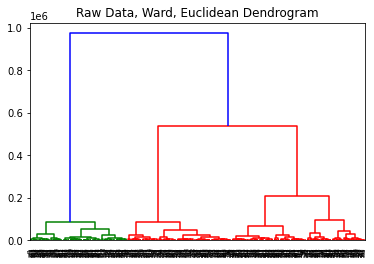

In [ ]:
# Plot dendrogram
dendrogram(hc_object)
plt.title('Raw Data, Ward, Euclidean Dendrogram')

In [ ]:
# Try out 2-15 clusters and make cluster assignments
customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration

for n in range(2, 16):
    customer_labels.append(fcluster(hc_object, n, criterion='maxclust'))

##### Evaluate the Clustering Results

In [ ]:
number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_raw, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_raw, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_raw_ward_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                                  columns = ["Number of Clusters", "C-H Score", "Silhouette Score"])
df_raw_ward_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,1260.628994,0.660224
3,3542.625083,0.739067
4,4827.224245,0.705973
5,4516.432670,0.690839
6,4547.366389,0.593777
7,5092.679539,0.514191
8,5431.079303,0.513307
9,5577.562376,0.506106
10,5960.182258,0.497257
11,6449.913697,0.494749


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_raw_ward_scores['Number of Clusters'].iloc[[df_raw_ward_scores['C-H Score'].idxmax()]].to_string(\
          index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_raw_ward_scores['Number of Clusters'].iloc[[\
          df_raw_ward_scores['Silhouette Score'].idxmax()]].to_string(index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       15
Number of clusters with the largest Silhouette Score:       3


The Calinski-Harabasz and Silhouette scores yield differing values for the optimal number of clusters. 15 clusters do not seem reasonable for this dataset considering the fact that the sufficient number of clusters was shown to be between 2-5 by the subplots of the raw data. Whether the same output results when a different method and distance metric are used will be determined.

#### Using Average Method and Cosine Distance Metric

In [ ]:
# Make hierarchical clustering linkage object with average method and cosine distance metric
hc_object = linkage(X_raw, method='average', metric='cosine')

Text(0.5, 1.0, 'Raw Data, Average, Cosine Dendrogram')

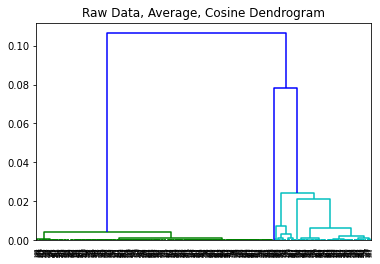

In [ ]:
# Plot dendrogram
dendrogram(hc_object)
plt.title('Raw Data, Average, Cosine Dendrogram')

In [ ]:
# Try out 2-15 clusters and make cluster assignments
customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration

for n in range(2, 16):
    customer_labels.append(fcluster(hc_object, n, criterion='maxclust'))

##### Evaluate the Clustering Results

In [ ]:
number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_raw, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_raw, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_raw_avg_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                                 columns = ["Number of Clusters", "C-H Score", "Silhouette Score"])
df_raw_avg_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,1260.628994,0.660224
3,631.430550,0.537651
4,428.836897,0.512228
5,322.330171,0.363369
6,257.412721,0.337543
7,215.700657,0.321042
8,323.281578,0.216222
9,282.532054,0.210769
10,251.477648,0.192421
11,476.941060,0.376965


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_raw_avg_scores['Number of Clusters'].iloc[[df_raw_avg_scores['C-H Score'].idxmax()]].to_string(\
          index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_raw_avg_scores['Number of Clusters'].iloc[[\
          df_raw_avg_scores['Silhouette Score'].idxmax()]].to_string(index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       2
Number of clusters with the largest Silhouette Score:       2


While the Calinski-Harabasz and Silhouette scores both yield 2 as the optimal number of clusters, a scaled dataset should be used so that all features have equal weighting and no one feature is favoured during clustering.

### Using Standard Scaler

#### Using Ward Method and Euclidean Distance Metric

In [ ]:
# Make hierarchical clustering linkage object
hc_object = linkage(X_std_scaled, method='ward', metric='euclidean')

Text(0.5, 1.0, 'Standard Scaled, Ward, Euclidean Dendrogram')

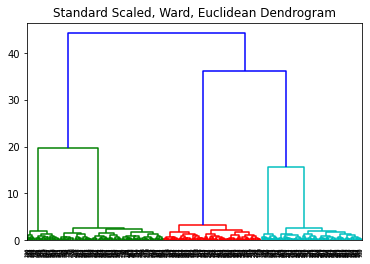

In [ ]:
# Plot dendrogram
dendrogram(hc_object)
plt.title('Standard Scaled, Ward, Euclidean Dendrogram')

In [ ]:
# Try out 2-15 clusters and make cluster assignments
customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration

for n in range(2, 16):
    customer_labels.append(fcluster(hc_object, n, criterion='maxclust'))

##### Evaluate the Clustering Results

In [ ]:
number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_std_scaled, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_std_scaled, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_std_ward_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                                  columns = ["Number of Clusters", "C-H Score", "Silhouette Score"])
df_std_ward_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,475.835829,0.514761
3,1066.581241,0.696348
4,1611.264737,0.758119
5,3671.358019,0.804898
6,3175.396680,0.627745
7,2795.272489,0.425870
8,2535.235395,0.271081
9,2333.504300,0.272530
10,2169.958896,0.266266
11,2031.900618,0.215712


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_std_ward_scores['Number of Clusters'].iloc[[df_std_ward_scores['C-H Score'].idxmax()]].to_string(\
          index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_std_ward_scores['Number of Clusters'].iloc[[\
          df_std_ward_scores['Silhouette Score'].idxmax()]].to_string(index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       5
Number of clusters with the largest Silhouette Score:       5


The Calinski-Harabasz and Silhouette scores both yield 5 as the optimal number of clusters. This seems reasonable for the given context.

#### Using Average Method and Cosine Distance Metric

In [ ]:
# Make hierarchical clustering linkage object with average method and cosine distance metric
hc_object = linkage(X_std_scaled, method='average', metric='cosine')

Text(0.5, 1.0, 'Standard Scaled, Average, Cosine Dendrogram')

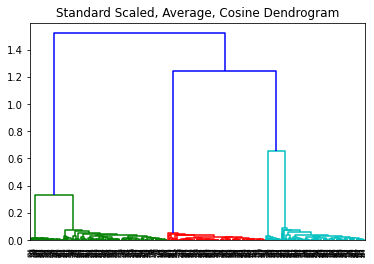

In [ ]:
# Plot dendrogram
dendrogram(hc_object)
plt.title('Standard Scaled, Average, Cosine Dendrogram')

In [ ]:
# Try out 2-15 clusters and make cluster assignments
customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration

for n in range(2, 16):
    customer_labels.append(fcluster(hc_object, n, criterion='maxclust'))

##### Evaluate the Clustering Results

In [ ]:
number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_std_scaled, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_std_scaled, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_std_avg_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                                 columns = ["Number of Clusters", "C-H Score", "Silhouette Score"])
df_std_avg_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,475.835829,0.514761
3,1066.581241,0.696348
4,1122.424892,0.732544
5,3671.358019,0.804898
6,2948.906246,0.670688
7,2550.242947,0.497876
8,2209.994474,0.484269
9,1940.093528,0.463553
10,1756.449649,0.444941
11,1631.556613,0.433175


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_std_avg_scores['Number of Clusters'].iloc[[df_std_avg_scores['C-H Score'].idxmax()]].to_string(\
          index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_std_avg_scores['Number of Clusters'].iloc[[\
          df_std_avg_scores['Silhouette Score'].idxmax()]].to_string(index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       5
Number of clusters with the largest Silhouette Score:       5


The Calinski-Harabasz and Silhouette scores both yield 5 as the optimal number of clusters which is the same result obtained when using Ward and Euclidean as the linkage method and distance metric respectively.

### Using MinMax Scaler

#### Using Ward Method and Euclidean Distance Metric

In [ ]:
# Make hierarchical clustering linkage object
hc_object = linkage(X_minmax_scaled, method='ward', metric='euclidean')

Text(0.5, 1.0, 'MinMax Scaled, Ward, Euclidean Dendrogram')

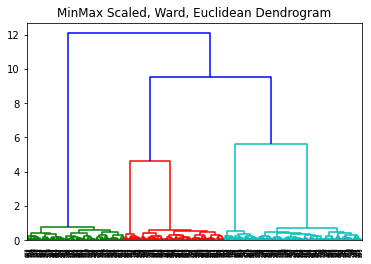

In [ ]:
# Plot dendrogram
dendrogram(hc_object)
plt.title('MinMax Scaled, Ward, Euclidean Dendrogram')

In [ ]:
# Try out 2-15 clusters and make cluster assignments
customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration

for n in range(2, 16):
    customer_labels.append(fcluster(hc_object, n, criterion='maxclust'))

##### Evaluate the Clustering Results

In [ ]:
number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_minmax_scaled, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_minmax_scaled, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_minmax_ward_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                                     columns = ["Number of Clusters", "C-H Score", "Silhouette Score"])
df_minmax_ward_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,481.086725,0.527051
3,947.439684,0.682351
4,1449.998273,0.756936
5,3840.105431,0.815691
6,3280.038966,0.629548
7,2893.857215,0.434943
8,2593.657742,0.273760
9,2378.051406,0.273138
10,2194.603617,0.265903
11,2046.405684,0.212033


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_minmax_ward_scores['Number of Clusters'].iloc[[\
          df_minmax_ward_scores['C-H Score'].idxmax()]].to_string(index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_minmax_ward_scores['Number of Clusters'].iloc[[\
          df_minmax_ward_scores['Silhouette Score'].idxmax()]].to_string(index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       5
Number of clusters with the largest Silhouette Score:       5


The Calinski-Harabasz and Silhouette scores both yield 5 as the optimal number of clusters. This seems reasonable for the given context.

#### Using Average Method and Cosine Distance Metric

In [ ]:
# Make hierarchical clustering linkage object
hc_object = linkage(X_minmax_scaled, method='average', metric='cosine')

Text(0.5, 1.0, 'MinMax Scaled, Average, Cosine Dendrogram')

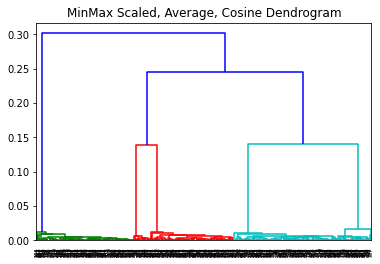

In [ ]:
# Plot dendrogram
dendrogram(hc_object)
plt.title('MinMax Scaled, Average, Cosine Dendrogram')

In [ ]:
# Try out 2-15 clusters and make cluster assignments
customer_labels = [] # store all K-Means clustering results for where n_cluster differs for each iteration

for n in range(2, 16):
    customer_labels.append(fcluster(hc_object, n, criterion='maxclust'))

##### Evaluate the Clustering Results

In [ ]:
number_labels = list(range(2,16)) # represents the n_clusters hyparameter passed in for each run

# Calculate C-H and Silhouette scores for each clustering run
ch_scores = [calinski_harabasz_score(X_minmax_scaled, cluster_labels) for cluster_labels in customer_labels]
silhouette_scores = [silhouette_score(X_minmax_scaled, cluster_labels) for cluster_labels in customer_labels]

# Summarize results in a dataframe
df_minmax_avg_scores = pd.DataFrame(list(zip(number_labels, ch_scores, silhouette_scores)), 
                                    columns = ["Number of Clusters", "C-H Score", "Silhouette Score"])
df_minmax_avg_scores.style.hide_index()

Number of Clusters,C-H Score,Silhouette Score
2,481.086725,0.527051
3,947.439684,0.682351
4,1449.998273,0.756936
5,3840.105431,0.815691
6,3118.970228,0.779161
7,2608.007735,0.632589
8,2267.010895,0.485686
9,2005.327251,0.461833
10,1786.451976,0.268004
11,1630.753805,0.236041


In [ ]:
# Print the number of clusters where the largest metric values occur
print(f"Number of clusters with the largest Calinski-Harabasz Score:\
      {df_minmax_avg_scores['Number of Clusters'].iloc[[\
          df_minmax_avg_scores['C-H Score'].idxmax()]].to_string(index = False)}")
      
print(f"Number of clusters with the largest Silhouette Score:\
      {df_minmax_avg_scores['Number of Clusters'].iloc[[\
          df_minmax_avg_scores['Silhouette Score'].idxmax()]].to_string(index = False)}")

Number of clusters with the largest Calinski-Harabasz Score:       5
Number of clusters with the largest Silhouette Score:       5


Similar to previous results when the data were scaled, the Calinski-Harabasz and Silhouette scores both yield 5 as the optimal number of clusters.

### Compare Results

For the hierarchical clustering algorithm, the highest Calinski-Harabasz and Silhouette scores are compared to determine which preprocessing method and hyperparameter combination yielded the best clustering result.

In [ ]:
# Make dictionaries so the key of the best score can be returned

ch_dict = {'Std, Ward, Euclidean': df_std_ward_scores['C-H Score'].max(),
           'Std, Avg, Cosine': df_std_avg_scores['C-H Score'].max(),
           'MinMax, Ward, Euclidean': df_minmax_ward_scores['C-H Score'].max(),
           'MinMax, Avg, Cosine': df_minmax_avg_scores['C-H Score'].max()}

silhouette_dict = {'Std, Ward, Euclidean': df_std_ward_scores['Silhouette Score'].max(),
           'Std, Avg, Cosine': df_std_avg_scores['Silhouette Score'].max(),
           'MinMax, Ward, Euclidean': df_minmax_ward_scores['Silhouette Score'].max(),
           'MinMax, Avg, Cosine': df_minmax_avg_scores['Silhouette Score'].max()}

In [ ]:
# Print the combination with highest C-H score
print(f"Best combination with the best Calinski-Harabasz score: {max(ch_dict, key=ch_dict.get)}")

# Print the combination with highest Silhouette score
print(f"Best combination with the best Silhouette score: {max(silhouette_dict, key=silhouette_dict.get)}")

Best combination with the best Calinski-Harabasz score: MinMax, Avg, Cosine
Best combination with the best Silhouette score: MinMax, Ward, Euclidean


In [ ]:
# Print differences
print(f"Calinski-Harabasz score difference between Ward-Euclidean and Average-Cosine:\
      {ch_dict.get('MinMax, Ward, Euclidean') - ch_dict.get('MinMax, Avg, Cosine')}")
      
print(f"Silhouette score difference between Ward-Euclidean and Average-Cosine:\
      {silhouette_dict.get('MinMax, Ward, Euclidean') - silhouette_dict.get('MinMax, Avg, Cosine')}")

Calinski-Harabasz score difference between Ward-Euclidean and Average-Cosine:      -9.094947017729282e-13
Silhouette score difference between Ward-Euclidean and Average-Cosine:      0.0


Upon further review, the linkage method-distance metric combinations give very similar highest scores when hierarchical clustering is applied on MinMax scaled data. The Ward-Euclidean combination has a highest Calinski-Harabasz score that is 9.09e-13 less than that of the Average-Cosine combination while both combinations have the same highest Silhouette score. The marginal difference suggests that either of these linkage method-distance metric combinations would suffice when hierarchical clustering is applied on MinMax scaled data.

When using the hierarchical clustering algorithm, scaling the customer dataset using a MinMaxScaler and clustering into 5 clusters yields the highest Calinski-Harabasz and Silhouette scores. This indicates that 5 is the optimal number of clusters for this dataset.

## 3. Model Comparison

In [ ]:
# Print the best internal validation metrics for the K-Means algorithm

print(f"Highest Calinski-Harabasz score from K-Means clustering: {df_minmax_scores['C-H Score'].max():.4f}")
print(f"Highest Silhouette score from K-Means clustering: {df_minmax_scores['Silhouette Score'].max():.4f}\n")

# Print the best internal validation metrics for the hierarchical clustering algorithm
print(f"Highest Calinski-Harabasz score from hierarchical clustering:\
      {ch_dict.get('MinMax, Ward, Euclidean'):.4f}")
      
print(f"Highest Silhouette score from hierarchical clustering:\
      {silhouette_dict.get('MinMax, Ward, Euclidean'):.4f}")

Highest Calinski-Harabasz score from K-Means clustering: 3840.1054
Highest Silhouette score from K-Means clustering: 0.8157

Highest Calinski-Harabasz score from hierarchical clustering:      3840.1054
Highest Silhouette score from hierarchical clustering:      0.8157


In [ ]:
%%time
# Time how long it takes for K-Means clustering with 5 clusters to run on MinMax scaled data
# Using MinMax scaled data and 5 optimal clusters are from step 1 
# where it was found that the best results were obtained when MinMax scaling was applied and n_clusters=5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_minmax_scaled)

CPU times: user 56.4 ms, sys: 487 µs, total: 56.9 ms
Wall time: 41.4 ms


In [ ]:
%%time
# Time how long it takes for hierarchical clustering with 5 clusters to run on MinMax scaled data 
# with 'ward' linkage method and 'euclidean' distance metric 
# 'ward' and 'euclidean' hyperparameters, using MinMax scaled data, and 5 optimal clusters are from step 2 
# where it was found that the best results were obtained with this combination

hc_object = linkage(X_minmax_scaled, method='ward', metric='euclidean')
hc_results = fcluster(hc_object, 5, criterion='maxclust')

CPU times: user 13.3 ms, sys: 0 ns, total: 13.3 ms
Wall time: 13.9 ms


In [ ]:
# Check the stats of the K-Means algorithm results
n_clusters = 5

# Convert cluster labels to type int to be able to append to a dataframe
# add 1 to make the cluster label number go from 1-5 (inclusively) instead of 0-4
# this is the convention used in hierarchical clustering results
kmeans_results = kmeans.labels_ + 1

# Add cluster assignment column to original dataset
df1['Cluster'] = kmeans_results

# Print stats for each cluster
for n in range(1, n_clusters + 1):
  print(f"Cluster {n}:")
  print(df1[df1['Cluster'] == n].describe())
  print('\n')

Cluster 1:
              Age         Income  SpendingScore       Savings  Cluster
count  126.000000     126.000000     126.000000    126.000000    126.0
mean    32.777778  105265.809524       0.309926  14962.778066      1.0
std      3.792390    6080.621753       0.045513   1061.734017      0.0
min     22.000000   89598.000000       0.174120  12207.526078      1.0
25%     30.000000  100760.250000       0.281237  14223.787562      1.0
50%     33.000000  106002.500000       0.309479  14976.943192      1.0
75%     35.000000  108858.750000       0.341096  15682.288845      1.0
max     44.000000  119877.000000       0.411112  17968.553929      1.0


Cluster 2:
              Age        Income  SpendingScore       Savings  Cluster
count  147.000000    147.000000     147.000000    147.000000    147.0
mean    87.775510  27866.102041       0.328800  16659.261445      2.0
std      3.508885   6448.805481       0.045224   1183.850178      0.0
min     79.000000  12000.000000       0.203140  13470.970

In [ ]:
# Check the stats of the hierarchical clustering algorithm results
n_clusters = 5

# Add cluster assignment column to original dataset
df1['Cluster'] = hc_results

# Print stats for each cluster
for n in range(1, n_clusters + 1):
  print(f"Cluster {n}:")
  print(df1[df1['Cluster'] == n].describe())
  print('\n')

Cluster 1:
              Age        Income  SpendingScore       Savings  Cluster
count  147.000000    147.000000     147.000000    147.000000    147.0
mean    87.775510  27866.102041       0.328800  16659.261445      1.0
std      3.508885   6448.805481       0.045224   1183.850178      0.0
min     79.000000  12000.000000       0.203140  13470.970605      1.0
25%     85.000000  23361.000000       0.301502  15957.282919      1.0
50%     88.000000  27771.000000       0.324719  16711.067980      1.0
75%     91.000000  32601.000000       0.357267  17433.126684      1.0
max     97.000000  46977.000000       0.473550  20000.000000      1.0


Cluster 2:
             Age         Income  SpendingScore       Savings  Cluster
count  25.000000      25.000000      25.000000     25.000000     25.0
mean   86.000000  119944.040000       0.068378  14808.683793      2.0
std     3.662877    4941.052254       0.039744   1159.339639      0.0
min    77.000000  110582.000000       0.000000  12554.692742      

For this customer dataset, the best clustering results of the K-Means and hierarchical clustering algorithms as measured by the Calinski-Harabasz and Silhouette internal validation metrics are the same. Both algorithms also give the same optimal number of clusters to use and the same cluster assignment results albeit labeled differently. This would lead to the same interpretation of the clustering results implying that the interpretability of the results from both algorithms is the same.

For this dataset, both algorithms execute quickly however, the hierarchical clustering algorithm is faster than the K-Means algorithm with the caveat being that the time taken to generate a dendrogram is not taken into account. The time taken to generate a dendrogram is a lot longer when compared to the time taken to generate a linkage object and assign clusters to each instance. A dendrogram illustrates the hierarchy of the data, help identify the number of clusters to use since it shows the potential clusters that would be formed at various granularities, and help visualize which data points are related and to what degree. However, for a clustering task such as this one where the purpose is to identify a few customer personas, a dendrogram would not be useful. 

On the contrary, scalability would be useful and important. The K-Means algorithm scales better than hierarchical clustering meaning that it would run faster when deployed on the larger customer dataset. For this exercise, only a subset of the customer data was used resulting in quick algorithm execution times. Nonetheless, generating a hierarchy and dendrogram for a larger dataset would be slower than using the K-Means clustering algorithm.

Because the number of personas to be identified—and therefore the number of clusters to use—is limited and the results of K-Means and hierarchical clustering algorithms are the same, deciding on which algorithm to use comes down to ease of use. Both algorithms require the optimal number of clusters to use for a dataset to be identified which can be done with trial-and-error and computing internal validation metrics. The difference between the algorithms—which adds complexity—is the hyperparameter possibilities. For the K-Means algorithm, the only distance metric that can be used is Euclidean. For hierarchical clustering, other distance metric possibilities exist along with multiple possible linkage methods. The selection of these hyperparameters to find the optimal combination adds complexity to the clustering process when the only purpose is to identify a few customer personas to target.

Therefore, because it executes quickly, is scalable and easier to use, and does not compromise the quality of results, the K-Means clustering algorithm is deemed to be better for clustering the customer dataset.